In [5]:
#part one: compute the jaccard similarity
#https://github.com/VipanchiKatthula/Jaccard_Cosine_Similarity/blob/master/Jaccard_and_Cosine_Similarity.ipynb
%pip install nltk

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

In [2]:
%pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 2.6.1
    Uninstalling sentence-transformers-2.6.1:
      Successfully uninstalled sentence-transformers-2.6.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-mpnet-base-v2')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [3]:
from sklearn.metrics.pairwise import cosine_similarity


In [4]:
import gensim
from gensim.utils import simple_preprocess

In [5]:
import os

In [6]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from gensim.utils import simple_preprocess

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('stopwords')

stop_words = stopwords.words('english')
newStopWords = ['ah', 'q', 'i', 'mrs', 'chao', 'zhao', 'sichen', 'woman', 'man', 'wife', 'candidate', 'one', 'two', 'three', 'four', 'five', 'would', 'weichuang', 'wang', 'szu', 'chen', 'pai', 'yen','wanted', 'amitabha','jump', 'forgetting', 'day', 'xiucai', 'soon', 'small', 'little', 'seem', 'seemed', 'also', 'said', 'time', 'never', 'seen', 'tum','clang','even','though','weizhuang','thousand', 'whether', 'without', 'others', 'hullo', 'yes', 'still', 'qian', 'cheng', 'rodney', 'qiang', '但可惜这姓是不甚可靠的', '郡名百家姓', '则据现在好称郡望的老例', 'qi', 'hu', 'qin', 'huei', 'qiyu','chongzheng','陇西天水人也', 'ren', 'shen', 'wezhuang','hizhuang','qianfu', 'cai', '因此籍贯there', 'qiyi', 'baiyan', '上的注解', 'wuzhuang', 'zhu', 'yixin', 'xuande','xun','ahuei', 'xunxun', 'zhuo', 'xian', 'zhuan','bao', 'qianjia', 'hecheng', '倘他姓赵', 'guantu', 'hong', 'zhuang', 'onhe', '可以照','bai','ye','yitong', 'qben','xiang','gu','xiao','jing', 'qians','zhaos','choi','hawh','shang']
stop_words.extend(newStopWords)

def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet), deacc=True) if word not in stop_words] for tweet in tweets]

def preprocessing(df):
    df['English_Verse'] = df['English_Verse'].str.lower()  # Convert to lowercase
    df['English_Verse'] = df['English_Verse'].str.replace("[^a-zA-Z#]", " ")  # Remove punctuations
    df['English_Verse'] = df['English_Verse'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))  # Remove short words
    df['Tweet tokens'] = df['English_Verse'].apply(lambda x: remove_stopwords([x])[0])
    df['tokens_no_stop_joined'] = df['Tweet tokens'].apply(lambda x: ' '.join(x))
    return df

def retrieve_text(df):
    doc = '. '.join(df['tokens_no_stop_joined'])
    return doc

def ngrams_series_func(data, n):
    wordList = re.sub("[^\w]", " ", data).split()
    ngrams_series = (pd.Series(nltk.ngrams(wordList, n)).value_counts())[:10]
    return ngrams_series

     

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#sentiment bi-grams tri-grams google
sentiment_google_df = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter1.csv')

for i in range(2, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter{i}.csv')

  sentiment_google_df = pd.concat([sentiment_google_df, df], axis=0)

sentiment_google_df_new = sentiment_google_df.rename(columns={'Tweet': 'English_Verse'})

columns_to_convert = ['Optimistic', 'Thankful', 'Empathetic', 'Pessimistic', 'Anxious', 'Sad', 'Annoyed', 'Denial', 'Joking']
sentiment_google_df_new[columns_to_convert] = sentiment_google_df_new[columns_to_convert].astype(int)
sentiment_google_df_new


,English_Verse,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking
0,"I want to do a right circulation for Ah Q, it ...",0,0,0,1,0,1,0,0,1
1,"However, it is difficult to make this quick ar...",0,0,0,0,0,0,1,0,1
2,"Secondly, the passage of Li Zhuan is probably ...",0,0,0,0,0,0,0,0,1
3,"""Ah Q, you are a muddy boy! Do you say I am yo...",0,0,0,0,0,0,1,0,1
4,Ah Q doesn't speak.,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
38,"""Help,......""",0,0,0,0,1,0,1,0,0
39,"However, A Q did not say.He had a dark eyes lo...",0,0,0,0,0,0,0,0,1
40,"As for the influence at the time, the biggest ...",0,0,0,0,0,1,1,0,1
41,"As for public opinion, there is no objection i...",0,0,0,0,0,0,1,0,0


In [14]:
sentiment_google_df_new = preprocessing(sentiment_google_df_new)
sentiment_google_df_new

,English_Verse,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking,Tweet tokens,tokens_no_stop_joined
0,want right circulation been more than year two...,0,0,0,1,0,1,0,0,1,"[want, right, circulation, year, thinking, sho...",want right circulation year thinking shows sta...
1,"however, difficult make this quick article, th...",0,0,0,0,0,0,1,0,1,"[however, difficult, make, quick, article, fee...",however difficult make quick article feel diff...
2,"secondly, passage zhuan probably first certain...",0,0,0,0,0,0,0,0,1,"[secondly, passage, probably, first, certain, ...",secondly passage probably first certain word c...
3,"muddy boy! your home?""",0,0,0,0,0,0,1,0,1,"[muddy, boy, home]",muddy boy home
4,doesn't speak.,0,0,0,0,0,0,1,0,1,[speak],speak
...,...,...,...,...,...,...,...,...,...,...,...,...
38,"""help,......""",0,0,0,0,1,0,1,0,0,[help],help
39,"however, say.he dark eyes long, ears buzzed, f...",0,0,0,0,0,0,0,0,1,"[however, say, dark, eyes, long, ears, buzzed,...",however say dark eyes long ears buzzed feeling...
40,"influence time, biggest inversed master linger...",0,0,0,0,0,1,1,0,1,"[influence, biggest, inversed, master, lingeri...",influence biggest inversed master lingering pu...
41,"public opinion, there objection weizhuang, nat...",0,0,0,0,0,0,1,0,0,"[public, opinion, objection, naturally, bad, s...",public opinion objection naturally bad shot ev...


In [15]:

df_optimistic_google = sentiment_google_df_new[sentiment_google_df_new['Optimistic'] == 1]
df_pessimistic_google = sentiment_google_df_new[sentiment_google_df_new['Pessimistic'] == 1]
df_denial_google = sentiment_google_df_new[sentiment_google_df_new['Denial'] == 1]
df_annoyed_google = sentiment_google_df_new[sentiment_google_df_new['Annoyed'] == 1]
df_thankful_google = sentiment_google_df_new[sentiment_google_df_new['Thankful'] == 1]
df_empathetic_google = sentiment_google_df_new[sentiment_google_df_new['Empathetic'] == 1]
df_anxious_google = sentiment_google_df_new[sentiment_google_df_new['Anxious'] == 1]
df_sad_google =  sentiment_google_df_new[sentiment_google_df_new['Sad'] == 1]
df_joking_google = sentiment_google_df_new[sentiment_google_df_new['Joking'] == 1]

In [16]:

text_optimistic_google = '. '.join(df_optimistic_google.tokens_no_stop_joined)
text_pessimistic_google = '. '.join(df_pessimistic_google.tokens_no_stop_joined)
text_denial_google = '. '.join(df_denial_google.tokens_no_stop_joined)
text_annoyed_google = '. '.join(df_annoyed_google.tokens_no_stop_joined)
text_thankful_google = '. '.join(df_thankful_google.tokens_no_stop_joined)
text_empathetic_google = '. '.join(df_empathetic_google.tokens_no_stop_joined)
text_anxious_google = '. '.join(df_anxious_google.tokens_no_stop_joined)
text_sad_google = '. '.join(df_sad_google.tokens_no_stop_joined)
text_joking_google = '. '.join(df_joking_google.tokens_no_stop_joined)

In [11]:
import re
import matplotlib.pyplot as plt

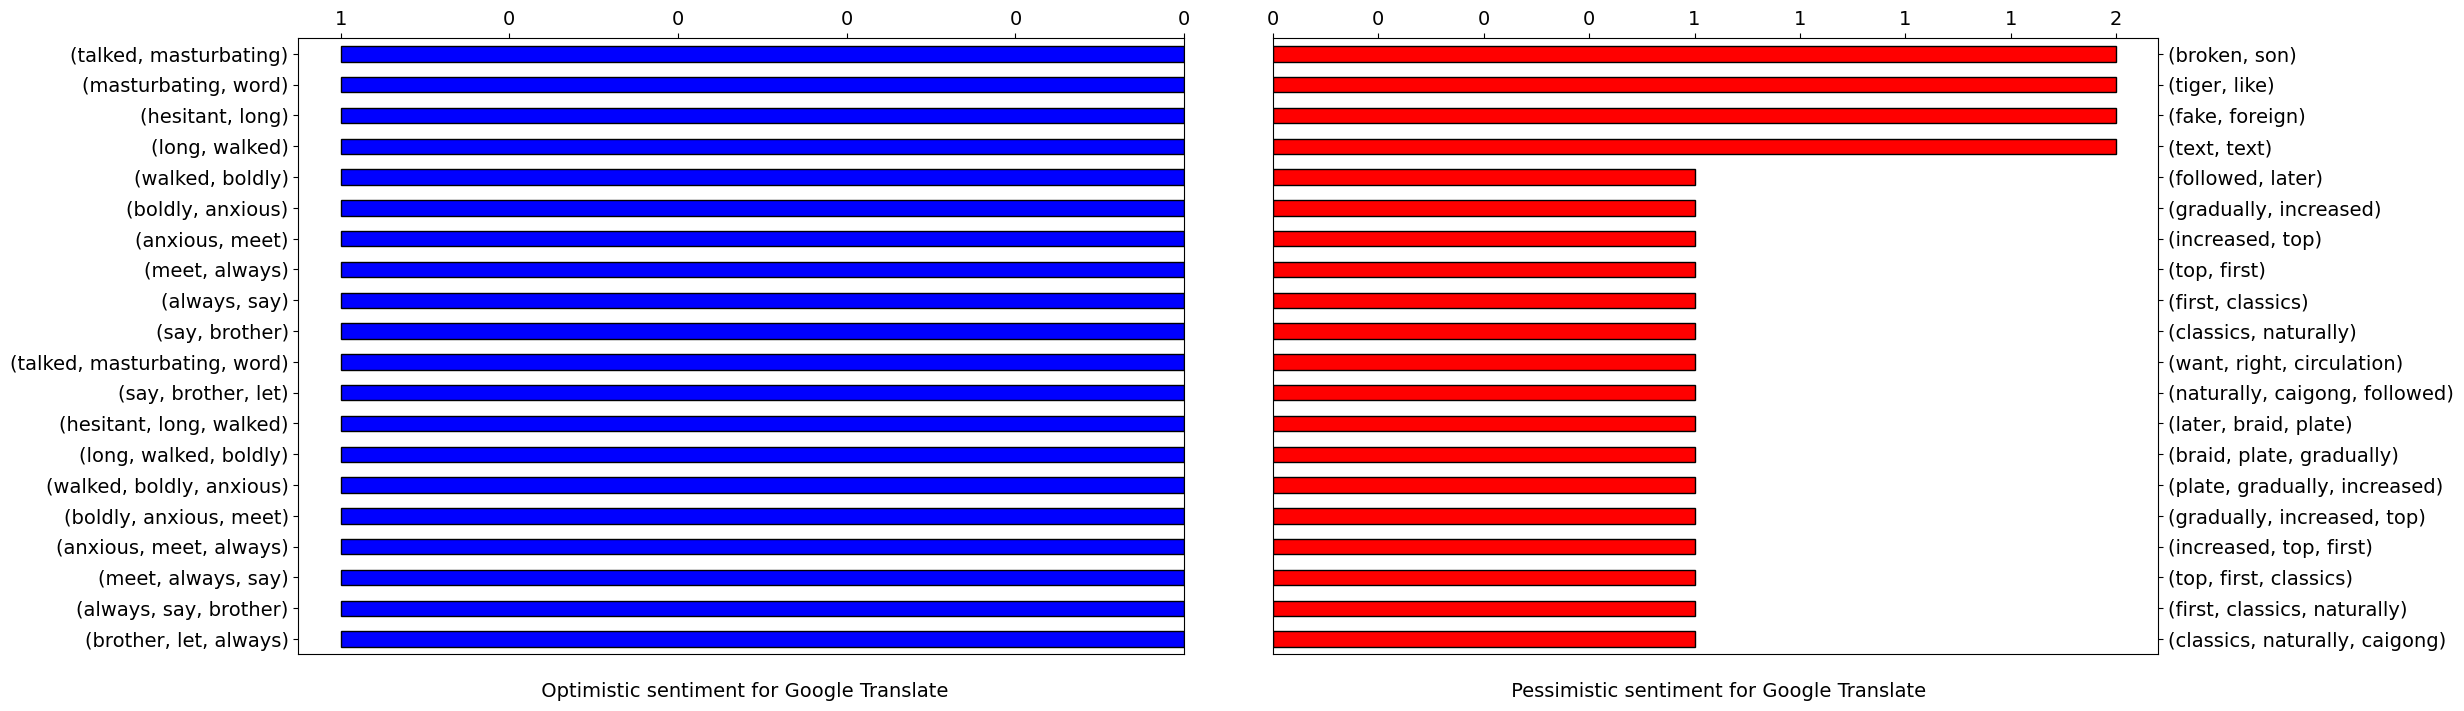

In [21]:
bigram1_google_sentiment = ngrams_series_func(text_optimistic_google, 2)
trigram1_google_sentiment = ngrams_series_func(text_optimistic_google, 3)


bigram2_google_sentiment = ngrams_series_func(text_pessimistic_google, 2)
trigram2_google_sentiment = ngrams_series_func(text_pessimistic_google, 3)

ngram1_google_sentiment = pd.concat([bigram1_google_sentiment, trigram1_google_sentiment])
ngram2_google_sentiment = pd.concat([bigram2_google_sentiment, trigram2_google_sentiment])

ngram1_google_sentiment = ngram1_google_sentiment.astype(int)
ngram2_google_sentiment = ngram2_google_sentiment.astype(int)

plt.rcParams.update({'font.size': 14})
fig, ax=plt.subplots(1, 2, figsize=(24, 8), gridspec_kw={'width_ratios': [1, 1], 'wspace': 0.1, 'hspace': 0.1})

barstyle = {'width': 0.5, 'edgecolor': 'black'} 
barh_ax = ax[0]
ngram1_google_sentiment[::-1].plot.barh(ax=barh_ax, color='blue', **barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")

barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n Optimistic sentiment for Google Translate')
barh_ax.set_ylabel('', fontsize=50)

barh_ax = ax[1]
ngram2_google_sentiment[::-1].plot.barh(ax=barh_ax, color='red', **barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")

barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_ylabel('', fontsize=50)
barh_ax.set_xlabel('\n Pessimistic sentiment for Google Translate')

# Formatter to convert float to int for x-axis labels
formatter = FuncFormatter(lambda x, _: int(x))

ax[0].xaxis.set_major_formatter(formatter)
ax[1].xaxis.set_major_formatter(formatter)

plt.show()
     


In [22]:
#sentiment bi-grams tri-grams hsien
sentiment_hsien_df = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter1.csv')

for i in range(2, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter{i}.csv')

  sentiment_hsien_df = pd.concat([sentiment_hsien_df, df], axis=0)

sentiment_hsien_df_new = sentiment_hsien_df.rename(columns={'Tweet': 'English_Verse'})
sentiment_hsien_df_new

,English_Verse,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking
0,For several years now I have been meaning to w...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,And yet no sooner had I taken up my pen than I...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,The second difficulty confronting me was that ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,"""Ah Q, you miserable wretch! Did you say I bel...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Ah Q made no reply.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
38,"""Help, help!""",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
39,But Ah Q never uttered these words. All had tu...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40,"As for the after-effects of the robbery, the m...",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
41,"As for any discussion of the event, no questio...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
sentiment_hsien_df_new = preprocessing(sentiment_hsien_df_new)
sentiment_hsien_df_new

,English_Verse,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking,Tweet tokens,tokens_no_stop_joined
0,several years have been meaning write true sto...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,"[several, years, meaning, write, true, story, ...",several years meaning write true story wanting...
1,sooner taken than became conscious tremendous ...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,"[sooner, taken, became, conscious, tremendous,...",sooner taken became conscious tremendous diffi...
2,second difficulty confronting that biography t...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[second, difficulty, confronting, biography, t...",second difficulty confronting biography type s...
3,"miserable wretch! belonged same clan you?""",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[miserable, wretch, belonged, clan]",miserable wretch belonged clan
4,made reply.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[made, reply]",made reply
...,...,...,...,...,...,...,...,...,...,...,...,...
38,"""help, help!""",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,"[help, help]",help help
39,never uttered these words. turned black before...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"[uttered, words, turned, black, eyes, buzzing,...",uttered words turned black eyes buzzing ears f...
40,"after-effects robbery, most affected successfu...",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,"[effects, robbery, affected, successful, provi...",effects robbery affected successful provincial...
41,"discussion event, question raised weichuang. n...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[discussion, event, question, raised, naturall...",discussion event question raised naturally agr...


In [28]:
df_optimistic_hsien = sentiment_hsien_df_new[sentiment_hsien_df_new['Optimistic'] == 1]
df_pessimistic_hsien = sentiment_hsien_df_new[sentiment_hsien_df_new['Pessimistic'] == 1]

In [29]:
text_optimistic_hsien = '. '.join(df_optimistic_hsien.tokens_no_stop_joined)
text_pessimistic_hsien = '. '.join(df_pessimistic_hsien.tokens_no_stop_joined)

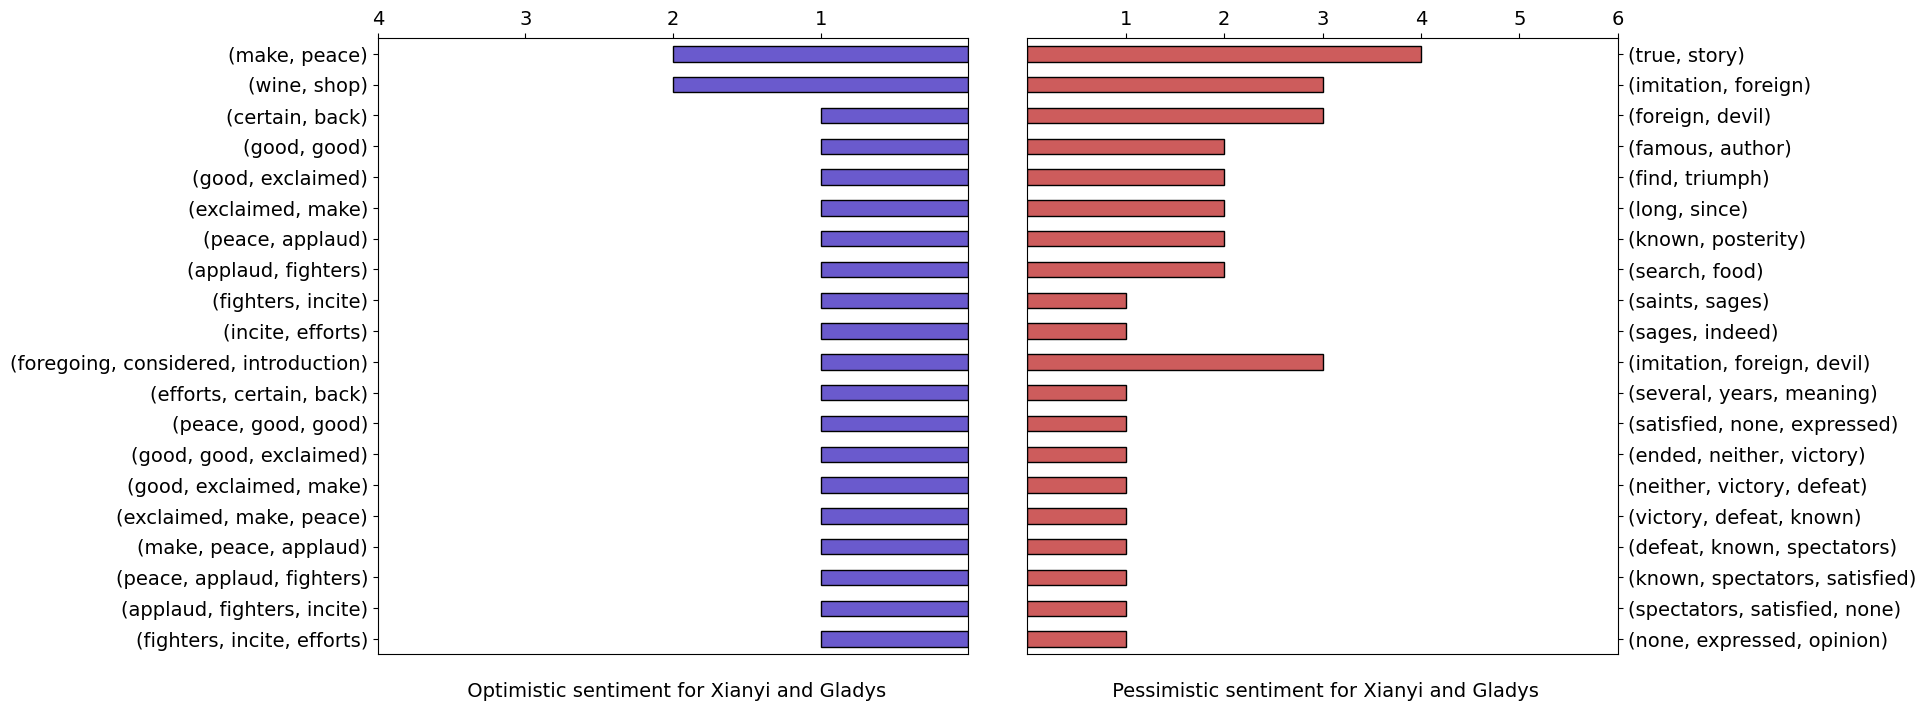

In [55]:
bigram1_hsien_sentiment = ngrams_series_func(text_optimistic_hsien, 2)
trigram1_hsien_sentiment = ngrams_series_func(text_optimistic_hsien, 3)


bigram2_hsien_sentiment = ngrams_series_func(text_pessimistic_hsien, 2)
trigram2_hsien_sentiment = ngrams_series_func(text_pessimistic_hsien, 3)

ngram1_hsien_sentiment = pd.concat([bigram1_hsien_sentiment, trigram1_hsien_sentiment])
ngram2_hsien_sentiment = pd.concat([bigram2_hsien_sentiment, trigram2_hsien_sentiment])
barcolors = ['slateblue','indianred']
ticks = [1,2,3,4]

plt.rcParams.update({'font.size': 14})
fig, ax=plt.subplots(1,2, figsize=(16,8), gridspec_kw = {'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
ngram1_hsien_sentiment[::-1].plot.barh(ax=barh_ax, color=barcolors[0],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
# barh_ax.xaxis.set_major_formatter(formatterK2)
# barh_ax.set_xlim([0, 1200])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n Optimistic sentiment for Xianyi and Gladys')
barh_ax.set_ylabel('',fontsize=50)
barh_ax.set_xticks(ticks, minor=False)

barh_ax = ax[1]
ngram2_hsien_sentiment[::-1].plot.barh(ax=barh_ax, color=barcolors[1],**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
# barh_ax.xaxis.set_major_formatter(formatterK2)
# barh_ax.set_xlim([0, 1200])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
# barh_ax.set_xlabel('Tri N-gram Count - Trump Dataset', fontsize=13)
barh_ax.set_ylabel('', fontsize=50)
barh_ax.set_xlabel('\n Pessimistic sentiment for Xianyi and Gladys')
barh_ax.set_xticks([1,2,3,4,5,6], minor=False)
plt.show()

In [36]:
#sentiment bi-grams tri-grams julia
sentiment_julia_df = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter1.csv')

for i in range(2, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter{i}.csv')

  sentiment_julia_df = pd.concat([sentiment_julia_df, df], axis=0)

sentiment_julia_df_new = sentiment_julia_df.rename(columns={'Tweet': 'English_Verse'})
sentiment_julia_df_new

,English_Verse,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking
0,"For some years now, I’ve been wanting to set d...",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,But as I take up my pen to begin this distinct...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,My second difficulty lies in how to start. You...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,"‘You stupid bastard, Ah-Q!’ the honourable Mr ...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Ah-Q said nothing.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
38,‘Help...’,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39,"But Ah-Q said nothing. His eyes were blind, hi...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40,It was Mr Provincial Examination who felt the ...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
41,Public opinion in Weizhuang was undivided: of ...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [37]:
sentiment_julia_df_new = preprocessing(sentiment_julia_df_new)
sentiment_julia_df_new

,English_Verse,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking,Tweet tokens,tokens_no_stop_joined
0,"some years now, i’ve been wanting down posteri...",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,"[years, wanting, posterity, story, quailed, di...",years wanting posterity story quailed difficul...
1,"take begin this distinctly mortal work, infini...",0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,"[take, begin, distinctly, mortal, work, infini...",take begin distinctly mortal work infinite dif...
2,second difficulty lies start. your average bio...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[second, difficulty, lies, start, average, bio...",second difficulty lies start average biography...
3,"‘you stupid bastard, ah-q!’ honourable zhao ro...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[stupid, bastard, honourable, roared, face, bl...",stupid bastard honourable roared face blotchin...
4,ah-q said nothing.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[nothing],nothing
...,...,...,...,...,...,...,...,...,...,...,...,...
38,‘help...’,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,[help],help
39,"ah-q said nothing. eyes were blind, ears were ...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"[nothing, eyes, blind, ears, buzzing, body, sc...",nothing eyes blind ears buzzing body scattered...
40,provincial examination felt effects business m...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,"[provincial, examination, felt, effects, busin...",provincial examination felt effects business k...
41,public opinion weizhuang undivided: course ah-...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,"[public, opinion, undivided, course, villain, ...",public opinion undivided course villain shot o...


In [38]:
df_optimistic_julia = sentiment_julia_df_new[sentiment_julia_df_new['Optimistic'] == 1]
df_pessimistic_julia = sentiment_julia_df_new[sentiment_julia_df_new['Pessimistic'] == 1]

In [39]:
text_optimistic_julia = '. '.join(df_optimistic_julia.tokens_no_stop_joined)
text_pessimistic_julia = '. '.join(df_pessimistic_julia.tokens_no_stop_joined)

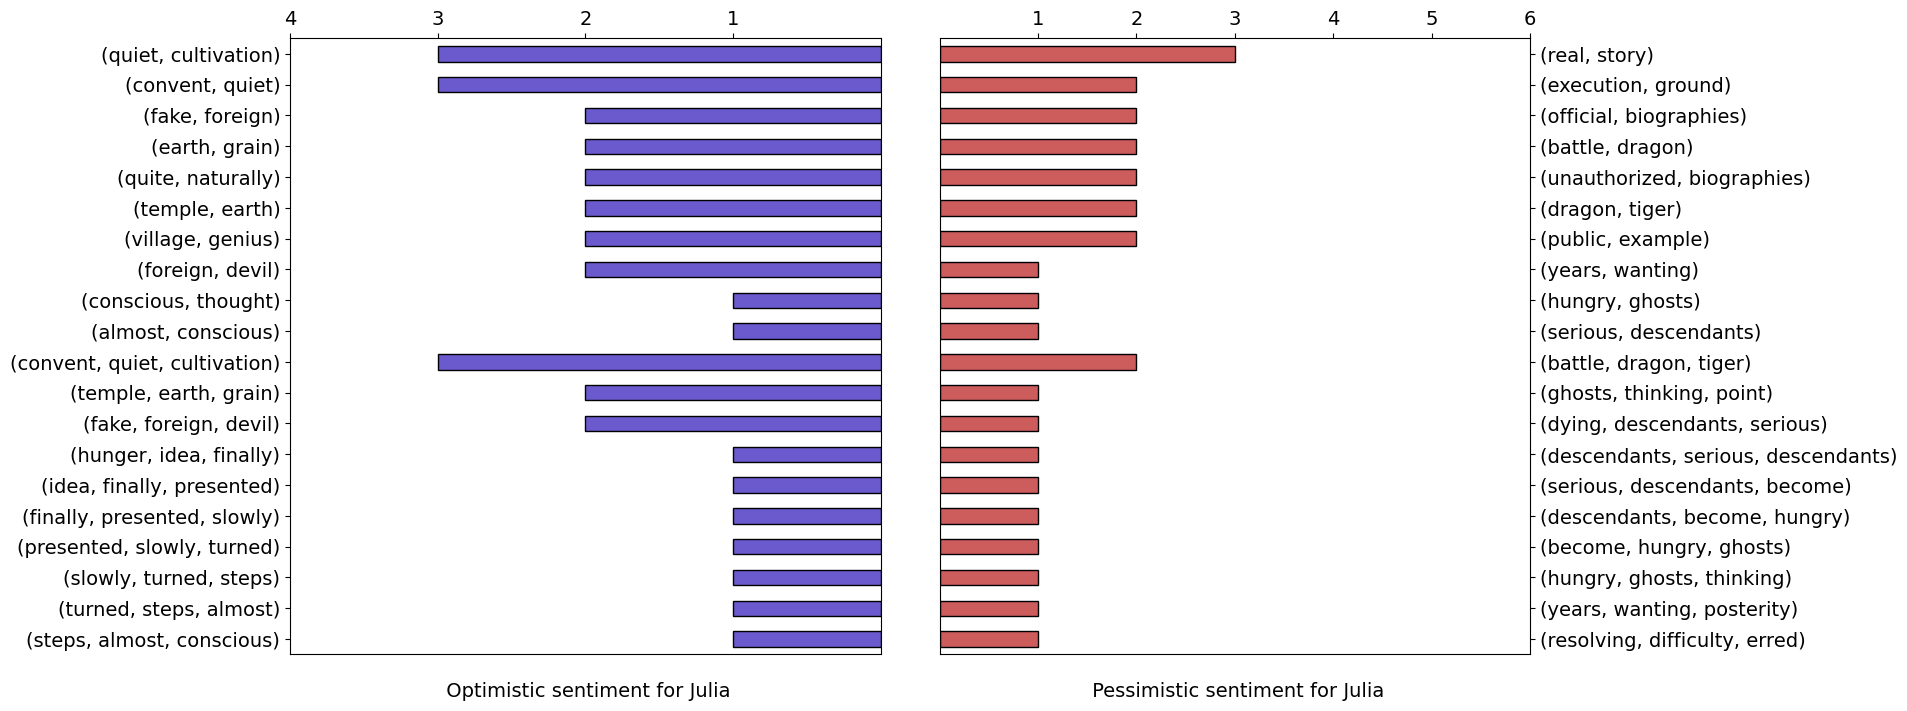

In [56]:
bigram1_julia_sentiment = ngrams_series_func(text_optimistic_julia, 2)
trigram1_julia_sentiment = ngrams_series_func(text_optimistic_julia, 3)


bigram2_julia_sentiment = ngrams_series_func(text_pessimistic_julia, 2)
trigram2_julia_sentiment = ngrams_series_func(text_pessimistic_julia, 3)

ngram1_julia_sentiment = pd.concat([bigram1_julia_sentiment, trigram1_julia_sentiment])
ngram2_julia_sentiment = pd.concat([bigram2_julia_sentiment, trigram2_julia_sentiment])

plt.rcParams.update({'font.size': 14})
fig, ax=plt.subplots(1,2, figsize=(16,8), gridspec_kw = {'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
ngram1_julia_sentiment[::-1].plot.barh(ax=barh_ax, color=barcolors[0],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
# barh_ax.xaxis.set_major_formatter(formatterK2)
# barh_ax.set_xlim([0, 1200])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n Optimistic sentiment for Julia')
barh_ax.set_ylabel('',fontsize=50)
barh_ax.set_xticks(ticks, minor=False)

barh_ax = ax[1]
ngram2_julia_sentiment[::-1].plot.barh(ax=barh_ax, color=barcolors[1],**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
# barh_ax.xaxis.set_major_formatter(formatterK2)
# barh_ax.set_xlim([0, 1200])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
# barh_ax.set_xlabel('Tri N-gram Count - Trump Dataset', fontsize=13)
barh_ax.set_ylabel('', fontsize=50)
barh_ax.set_xlabel('\n Pessimistic sentiment for Julia')
barh_ax.set_xticks([1,2,3,4,5,6], minor=False)
plt.show()

In [57]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from gensim.utils import simple_preprocess

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('stopwords')

stop_words = stopwords.words('english')
newStopWords = ['ah', 'q', 'i', 'mrs', 'chao', 'zhao', 'sichen', 'woman', 'man', 'wife', 'candidate', 'one', 'two', 'three', 'four', 'five', 'would', 'weichuang', 'wang', 'szu', 'chen', 'pai', 'yen','wanted', 'amitabha','jump', 'forgetting', 'day', 'xiucai', 'soon', 'small', 'little', 'seem', 'seemed', 'also', 'said', 'time', 'never', 'seen', 'tum','clang','even','though','weizhuang','thousand']
stop_words.extend(newStopWords)

def remove_stopwords(tweets):
    return [[word for word in simple_preprocess(str(tweet), deacc=True) if word not in stop_words] for tweet in tweets]

def preprocessing(df):
    df['English_Verse'] = df['English_Verse'].str.lower()  # Convert to lowercase
    df['English_Verse'] = df['English_Verse'].str.replace("[^a-zA-Z#]", " ")  # Remove punctuations
    df['English_Verse'] = df['English_Verse'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))  # Remove short words
    df['Tweet tokens'] = df['English_Verse'].apply(lambda x: remove_stopwords([x])[0])
    df['tokens_no_stop_joined'] = df['Tweet tokens'].apply(lambda x: ' '.join(x))
    return df

def retrieve_text(df):
    doc = '. '.join(df['tokens_no_stop_joined'])
    return doc

def ngrams_series_func(data, n):
    wordList = re.sub("[^\w]", " ", data).split()
    ngrams_series = (pd.Series(nltk.ngrams(wordList, n)).value_counts())[:10]
    return ngrams_series

     

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#read files from hsien
path_hsien_ngrams = '/Users/wangxuechun/unsw/thesis-repo/Data_set/hsien_dataset/'

files_hsien_ngrams = [f'chapter_{i}_eng_version_hsien.csv' for i in range(1, 10)]
dfs_hsien_ngrams = []
for i, file in enumerate(files_hsien_ngrams, start=1):
    df = pd.read_csv(os.path.join(path_hsien_ngrams, file))
    
    # Dynamically generate the column name
    old_column_name = f'English_Verse_chap{i}_hsien'
    new_column_name = 'English_Verse'
    
    # Rename the column
    if old_column_name in df.columns:
        df.rename(columns={old_column_name: new_column_name}, inplace=True)
    
    # Append the DataFrame to the list
    dfs_hsien_ngrams.append(df)

combined_hsien_ngrams = pd.concat(dfs_hsien_ngrams, ignore_index=True)

combined_hsien_ngrams

,English_Verse
0,For several years now I have been meaning to w...
1,And yet no sooner had I taken up my pen than I...
2,The second difficulty confronting me was that ...
3,"""Ah Q, you miserable wretch! Did you say I bel..."
4,Ah Q made no reply.
...,...
275,"""Help, help!"""
276,But Ah Q never uttered these words. All had tu...
277,"As for the after-effects of the robbery, the m..."
278,"As for any discussion of the event, no questio..."


In [38]:
df_ngrams_hsien = pd.DataFrame(combined_hsien_ngrams)
df_ngrams_hsien = preprocessing(df_ngrams_hsien)
df_ngrams_hsien

,English_Verse,Tweet tokens,tokens_no_stop_joined
0,several years have been meaning write true sto...,"[several, years, meaning, write, true, story, ...",several years meaning write true story wanting...
1,sooner taken than became conscious tremendous ...,"[sooner, taken, became, conscious, tremendous,...",sooner taken became conscious tremendous diffi...
2,second difficulty confronting that biography t...,"[second, difficulty, confronting, biography, t...",second difficulty confronting biography type s...
3,"miserable wretch! belonged same clan you?""","[miserable, wretch, belonged, clan]",miserable wretch belonged clan
4,made reply.,"[made, reply]",made reply
...,...,...,...
275,"""help, help!""","[help, help]",help help
276,never uttered these words. turned black before...,"[never, uttered, words, turned, black, eyes, b...",never uttered words turned black eyes buzzing ...
277,"after-effects robbery, most affected successfu...","[effects, robbery, affected, successful, provi...",effects robbery affected successful provincial...
278,"discussion event, question raised weichuang. n...","[discussion, event, question, raised, naturall...",discussion event question raised naturally agr...


In [39]:
text_hsien = retrieve_text(df_ngrams_hsien)

In [21]:
import re
import matplotlib.pyplot as plt

Text(0, 0.5, '')

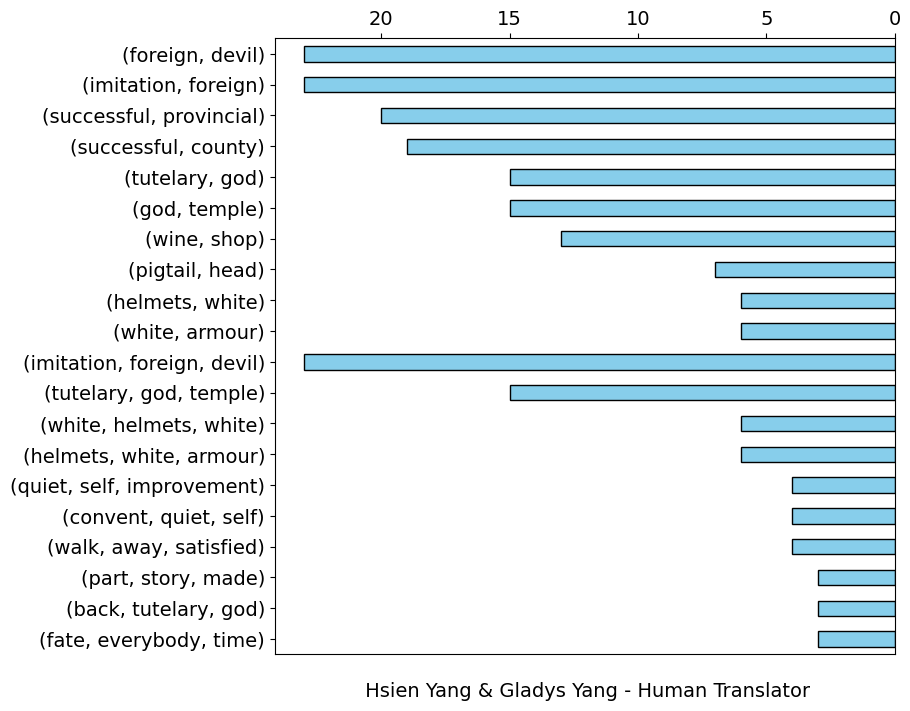

In [41]:
bigram1_hsien = ngrams_series_func(text_hsien, 2)
trigram1_hsien = ngrams_series_func(text_hsien, 3)



ngram1_hsien = pd.concat([bigram1_hsien, trigram1_hsien])
barstyle = {'width': 0.5, 'edgecolor': 'black'}

plt.rcParams.update({'font.size': 14})
fig, ax=plt.subplots(1,1, figsize=(8,8))

barh_ax = ax

ngram1_hsien[::-1].plot.barh(ax=barh_ax, color= 'skyblue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n Hsien Yang & Gladys Yang - Human Translator')
barh_ax.set_ylabel('',fontsize=50)

In [42]:
#bi grams and trigrams google
path_google_ngrams = '/Users/wangxuechun/unsw/thesis-repo/Data_set/google_dataset/'

files_google_ngrams = [f'chapter_{i}_eng_version_google.csv' for i in range(1, 10)]
dfs_google_ngrams = []
for i, file in enumerate(files_google_ngrams, start=1):
    df = pd.read_csv(os.path.join(path_google_ngrams, file))
    
    # Dynamically generate the column name
    old_column_name = f'English_Verse_chap{i}_google'
    new_column_name = 'English_Verse'
    
    # Rename the column
    if old_column_name in df.columns:
        df.rename(columns={old_column_name: new_column_name}, inplace=True)
    
    # Append the DataFrame to the list
    dfs_google_ngrams.append(df)

combined_google_ngrams = pd.concat(dfs_google_ngrams, ignore_index=True)

combined_google_ngrams


,English_Verse
0,"I want to do a right circulation for Ah Q, it ..."
1,"However, it is difficult to make this quick ar..."
2,"Secondly, the passage of Li Zhuan is probably ..."
3,"""Ah Q, you are a muddy boy! Do you say I am yo..."
4,Ah Q doesn't speak.
...,...
275,"""Help,......"""
276,"However, A Q did not say.He had a dark eyes lo..."
277,"As for the influence at the time, the biggest ..."
278,"As for public opinion, there is no objection i..."


In [64]:
df_ngrams_google = pd.DataFrame(combined_google_ngrams)
df_ngrams_google = preprocessing(df_ngrams_google)
df_ngrams_google

,English_Verse,Tweet tokens,tokens_no_stop_joined
0,want right circulation been more than year two...,"[want, right, circulation, year, thinking, sho...",want right circulation year thinking shows sta...
1,"however, difficult make this quick article, th...","[however, difficult, make, quick, article, fee...",however difficult make quick article feel diff...
2,"secondly, passage zhuan probably first certain...","[secondly, passage, zhuan, probably, first, ce...",secondly passage zhuan probably first certain ...
3,"muddy boy! your home?""","[muddy, boy, home]",muddy boy home
4,doesn't speak.,[speak],speak
...,...,...,...
275,"""help,......""",[help],help
276,"however, say.he dark eyes long, ears buzzed, f...","[however, say, dark, eyes, long, ears, buzzed,...",however say dark eyes long ears buzzed feeling...
277,"influence time, biggest inversed master linger...","[influence, biggest, inversed, master, lingeri...",influence biggest inversed master lingering pu...
278,"public opinion, there objection weizhuang, nat...","[public, opinion, objection, weizhuang, natura...",public opinion objection weizhuang naturally b...


In [65]:
text_google = retrieve_text(df_ngrams_google)

Text(0, 0.5, '')

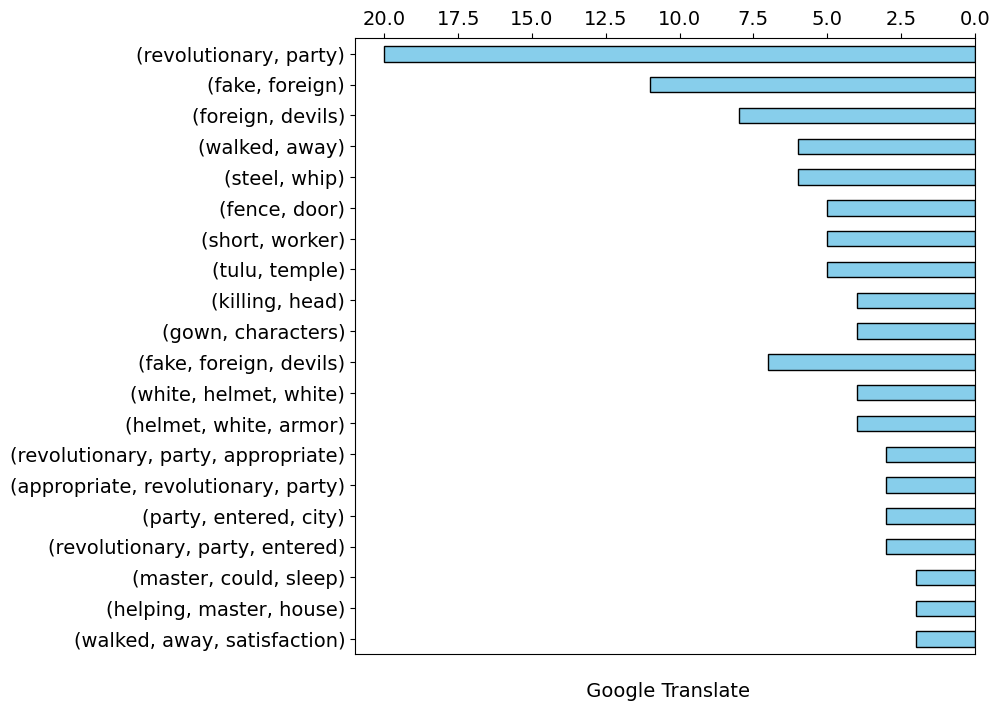

In [66]:
bigram1_google = ngrams_series_func(text_google, 2)
trigram1_google = ngrams_series_func(text_google, 3)



ngram1_google = pd.concat([bigram1_google, trigram1_google])
barstyle = {'width': 0.5, 'edgecolor': 'black'}
ticks = [2,4,6,8,10,12,14,16,18,20]
plt.rcParams.update({'font.size': 14})
fig, ax=plt.subplots(1,1, figsize=(8,8))

barh_ax = ax

ngram1_google[::-1].plot.barh(ax=barh_ax, color= 'skyblue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n Google Translate')
barh_ax.set_ylabel('',fontsize=50)

In [67]:
#bi grams and trigrams julia
path_julia_ngrams = '/Users/wangxuechun/unsw/thesis-repo/Data_set/julia_dataset/'

files_julia_ngrams = [f'chapter_{i}_eng_version_julia.csv' for i in range(1, 10)]
dfs_julia_ngrams = []
for i, file in enumerate(files_julia_ngrams, start=1):
    df = pd.read_csv(os.path.join(path_julia_ngrams, file))
    
    # Dynamically generate the column name
    old_column_name = f'English_Verse_chap{i}_julia'
    new_column_name = 'English_Verse'
    
    # Rename the column
    if old_column_name in df.columns:
        df.rename(columns={old_column_name: new_column_name}, inplace=True)
    
    # Append the DataFrame to the list
    dfs_julia_ngrams.append(df)

combined_julia_ngrams = pd.concat(dfs_julia_ngrams, ignore_index=True)

combined_julia_ngrams

,English_Verse
0,"For some years now, I’ve been wanting to set d..."
1,But as I take up my pen to begin this distinct...
2,My second difficulty lies in how to start. You...
3,"‘You stupid bastard, Ah-Q!’ the honourable Mr ..."
4,Ah-Q said nothing.
...,...
275,‘Help...’
276,"But Ah-Q said nothing. His eyes were blind, hi..."
277,It was Mr Provincial Examination who felt the ...
278,Public opinion in Weizhuang was undivided: of ...


In [72]:
df_ngrams_julia = pd.DataFrame(combined_julia_ngrams)
df_ngrams_julia = preprocessing(df_ngrams_julia)
df_ngrams_julia

,English_Verse,Tweet tokens,tokens_no_stop_joined
0,"some years now, i’ve been wanting down posteri...","[years, wanting, posterity, story, quailed, di...",years wanting posterity story quailed difficul...
1,"take begin this distinctly mortal work, infini...","[take, begin, distinctly, mortal, work, infini...",take begin distinctly mortal work infinite dif...
2,second difficulty lies start. your average bio...,"[second, difficulty, lies, start, average, bio...",second difficulty lies start average biography...
3,"‘you stupid bastard, ah-q!’ honourable zhao ro...","[stupid, bastard, honourable, roared, face, bl...",stupid bastard honourable roared face blotchin...
4,ah-q said nothing.,[nothing],nothing
...,...,...,...
275,‘help...’,[help],help
276,"ah-q said nothing. eyes were blind, ears were ...","[nothing, eyes, blind, ears, buzzing, body, sc...",nothing eyes blind ears buzzing body scattered...
277,provincial examination felt effects business m...,"[provincial, examination, felt, effects, busin...",provincial examination felt effects business k...
278,public opinion weizhuang undivided: course ah-...,"[public, opinion, undivided, course, villain, ...",public opinion undivided course villain shot o...


In [73]:
text_julia = retrieve_text(df_ngrams_julia)

Text(0, 0.5, '')

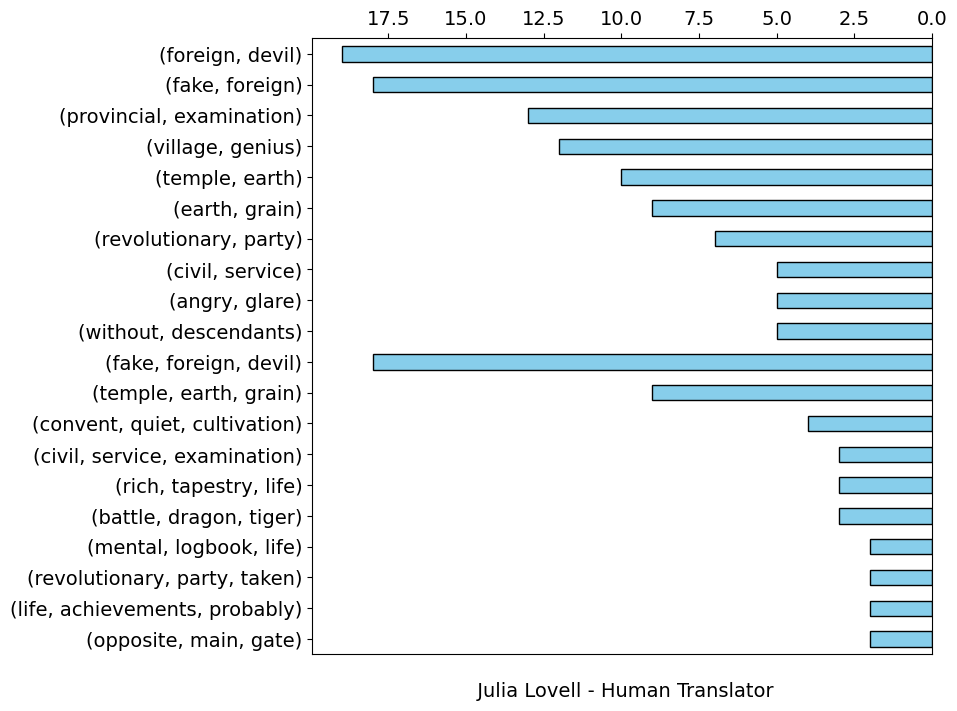

In [74]:
bigram1_julia = ngrams_series_func(text_julia, 2)
trigram1_julia = ngrams_series_func(text_julia, 3)



ngram1_julia = pd.concat([bigram1_julia, trigram1_julia])
barstyle = {'width': 0.5, 'edgecolor': 'black'}

plt.rcParams.update({'font.size': 14})
fig, ax=plt.subplots(1,1, figsize=(8,8))

barh_ax = ax

ngram1_julia[::-1].plot.barh(ax=barh_ax, color= 'skyblue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("bottom")
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('\n Julia Lovell - Human Translator')
barh_ax.set_ylabel('',fontsize=50)

In [6]:
#load the file
sentences = []

for i in range(1, 10):

  hsien_chapter= pd.read_csv(f'//Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter{i}.csv')
  google_chapter = pd.read_csv(f'//Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter{i}.csv')
  julia_chapter = pd.read_csv(f'//Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter{i}.csv')

  sentence1 = hsien_chapter['Tweet'].tolist()
  sentence2 = google_chapter['Tweet'].tolist()
  sentence3 = julia_chapter['Tweet'].tolist()

  sentences.append(sentence1)
  sentences.append(sentence2)
  sentences.append(sentence3)
  

  # print('Chapter - ', str(chapter), ' ', len(eknath_easwaran_chapter))

sentence_new = []
for i in range(0, len(sentences)):
  for j in range(0, len(sentences[i])):
    sentence_new.append(sentences[i][j])

sentence_embeddings = model.encode(sentence_new)

In [7]:
semantic_df = pd.DataFrame(columns=['Chapter', 'Verse', 'Xianyi Yang & Gladys Yang','Google Translate','Julia Lovell', 'Xianyi & Gladys - Google','Julia - Google','Xianyi & Gladys - Julia'])
     
     


In [133]:
sentence_new[797]

'After the robbery at the Zhaos’, Weizhuang – Ah-Q included – was abuzz with a kind of pleasurable terror. Four days after the event itself, however, Ah-Q found himself being dragged through the middle of the night into the county town. Under cover of darkness, three squads – of soldiers, of militiamen and of policemen – and five detectives stole into the village and surrounded the Temple of Earth and Grain, propping up machine-guns opposite the main gate. Yet Ah-Q failed to make a dash for it. After a lengthy wait, uninterrupted by any kind of noise or movement, the captain grew anxious enough to offer a reward of twenty thousand coppers, at which two of the militiamen at last bravely volunteered. Once the vanguard had scrambled in over the wall, the forces outside rushed in to capture Ah-Q, who didn’t begin to wake up until he was parked, a prisoner of the law, to the left of the machine-gun outside the temple. '

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
i = 0
j = 12
k = 24
verse = 1

for i in range(0, 12):

  hsien_google_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  julia_google_cosine = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  hsien_julia_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[k]])[0][0]

  dict1 = {'Chapter': [1], 'Verse': verse, 'Xianyi Yang & Gladys Yang': [sentence_new[i]], 'Google Translate': [sentence_new[j]], 'Julia Lovell': [sentence_new[k]],
                'Xianyi & Gladys - Google': [hsien_google_cosine], 'Julia - Google': [julia_google_cosine], 'Xianyi & Gladys - Julia': [hsien_julia_cosine]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new_cosine = pd.DataFrame(dict1)
  semantic_df = pd.concat([semantic_df, df_new_cosine], ignore_index = True)

/var/folders/c6/x83g8r650s9033gx_jgr7dsr0000gn/T/ipykernel_75588/2180806510.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  semantic_df = pd.concat([semantic_df, df_new_cosine], ignore_index = True)


In [10]:
print(semantic_df['Xianyi & Gladys - Google'].mean())
print(semantic_df['Julia - Google'].mean())
print(semantic_df['Xianyi & Gladys - Julia'].mean())
print(semantic_df['Xianyi & Gladys - Google'].min())
print(semantic_df['Julia - Google'].min())
print(semantic_df['Xianyi & Gladys - Julia'].min())

0.6371433
0.6216104
0.77013105
0.36163276
0.3131757
0.5048295


In [9]:
i = 36
j = 59
k = 82
verse = 1

for i in range(36, 59):

  hsien_google_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  julia_google_cosine = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  hsien_julia_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[k]])[0][0]

  dict1 = {'Chapter': [2], 'Verse': verse, 'Xianyi Yang & Gladys Yang': [sentence_new[i]], 'Google Translate': [sentence_new[j]], 'Julia Lovell': [sentence_new[k]],
                'Xianyi & Gladys - Google': [hsien_google_cosine], 'Julia - Google': [julia_google_cosine], 'Xianyi & Gladys - Julia': [hsien_julia_cosine]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new_cosine = pd.DataFrame(dict1)
  semantic_df = pd.concat([semantic_df, df_new_cosine], ignore_index = True)

/var/folders/c6/x83g8r650s9033gx_jgr7dsr0000gn/T/ipykernel_78325/3345115390.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  semantic_df = pd.concat([semantic_df, df_new_cosine], ignore_index = True)


In [18]:
print(semantic_df['Xianyi & Gladys - Google'].mean())
print(semantic_df['Julia - Google'].mean())
print(semantic_df['Xianyi & Gladys - Julia'].mean())
print(semantic_df['Xianyi & Gladys - Google'].min())
print(semantic_df['Julia - Google'].min())
print(semantic_df['Xianyi & Gladys - Julia'].min())

0.644953
0.5908621
0.7640046
0.35068238
0.34485066
0.45276165


In [12]:
i = 105
j = 138
k = 171
verse = 1

for i in range(105, 138):

  hsien_google_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  julia_google_cosine = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  hsien_julia_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[k]])[0][0]

  dict1 = {'Chapter': [3], 'Verse': verse, 'Xianyi Yang & Gladys Yang': [sentence_new[i]], 'Google Translate': [sentence_new[j]], 'Julia Lovell': [sentence_new[k]],
                'Xianyi & Gladys - Google': [hsien_google_cosine], 'Julia - Google': [julia_google_cosine], 'Xianyi & Gladys - Julia': [hsien_julia_cosine]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new_cosine = pd.DataFrame(dict1)
  semantic_df = pd.concat([semantic_df, df_new_cosine], ignore_index = True)

In [25]:
print(semantic_df['Xianyi & Gladys - Google'].mean())
print(semantic_df['Julia - Google'].mean())
print(semantic_df['Xianyi & Gladys - Julia'].mean())
print(semantic_df['Xianyi & Gladys - Google'].min())
print(semantic_df['Julia - Google'].min())
print(semantic_df['Xianyi & Gladys - Julia'].min())

0.63323903
0.57801807
0.7245583
0.29280394
0.23555037
0.38561678


In [13]:
i = 204
j = 246
k = 288
verse = 1

for i in range(204, 246):

  hsien_google_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  julia_google_cosine = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  hsien_julia_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[k]])[0][0]

  dict1 = {'Chapter': [4], 'Verse': verse, 'Xianyi Yang & Gladys Yang': [sentence_new[i]], 'Google Translate': [sentence_new[j]], 'Julia Lovell': [sentence_new[k]],
                'Xianyi & Gladys - Google': [hsien_google_cosine], 'Julia - Google': [julia_google_cosine], 'Xianyi & Gladys - Julia': [hsien_julia_cosine]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new_cosine = pd.DataFrame(dict1)
  semantic_df = pd.concat([semantic_df, df_new_cosine], ignore_index = True)

In [29]:
print(semantic_df['Xianyi & Gladys - Google'].mean())
print(semantic_df['Julia - Google'].mean())
print(semantic_df['Xianyi & Gladys - Julia'].mean())
print(semantic_df['Xianyi & Gladys - Google'].min())
print(semantic_df['Julia - Google'].min())
print(semantic_df['Xianyi & Gladys - Julia'].min())

0.71123356
0.6451705
0.724734
0.44393831
0.19013807
0.28743976


In [14]:
i = 330
j = 357
k = 384
verse = 1

for i in range(330, 357):

  hsien_google_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  julia_google_cosine = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  hsien_julia_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[k]])[0][0]

  dict1 = {'Chapter': [5], 'Verse': verse, 'Xianyi Yang & Gladys Yang': [sentence_new[i]], 'Google Translate': [sentence_new[j]], 'Julia Lovell': [sentence_new[k]],
                'Xianyi & Gladys - Google': [hsien_google_cosine], 'Julia - Google': [julia_google_cosine], 'Xianyi & Gladys - Julia': [hsien_julia_cosine]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new_cosine = pd.DataFrame(dict1)
  semantic_df = pd.concat([semantic_df, df_new_cosine], ignore_index = True)

In [33]:
print(semantic_df['Xianyi & Gladys - Google'].mean())
print(semantic_df['Julia - Google'].mean())
print(semantic_df['Xianyi & Gladys - Julia'].mean())
print(semantic_df['Xianyi & Gladys - Google'].min())
print(semantic_df['Julia - Google'].min())
print(semantic_df['Xianyi & Gladys - Julia'].min())

0.68133247
0.6342681
0.7641537
0.4562778
0.16131389
0.3738956


In [15]:
i = 411
j = 443
k = 475
verse = 1

for i in range(411, 443):

  hsien_google_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  julia_google_cosine = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  hsien_julia_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[k]])[0][0]

  dict1 = {'Chapter': [6], 'Verse': verse, 'Xianyi Yang & Gladys Yang': [sentence_new[i]], 'Google Translate': [sentence_new[j]], 'Julia Lovell': [sentence_new[k]],
                'Xianyi & Gladys - Google': [hsien_google_cosine], 'Julia - Google': [julia_google_cosine], 'Xianyi & Gladys - Julia': [hsien_julia_cosine]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new_cosine = pd.DataFrame(dict1)
  semantic_df = pd.concat([semantic_df, df_new_cosine], ignore_index = True)

In [37]:
print(semantic_df['Xianyi & Gladys - Google'].mean())
print(semantic_df['Julia - Google'].mean())
print(semantic_df['Xianyi & Gladys - Julia'].mean())
print(semantic_df['Xianyi & Gladys - Google'].min())
print(semantic_df['Julia - Google'].min())
print(semantic_df['Xianyi & Gladys - Julia'].min())

0.69884795
0.5400199
0.58666587
0.33664954
0.16020322
0.240831


In [16]:
i = 507
j = 547
k = 587
verse = 1

for i in range(507, 547):

  hsien_google_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  julia_google_cosine = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  hsien_julia_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[k]])[0][0]

  dict1 = {'Chapter': [7], 'Verse': verse, 'Xianyi Yang & Gladys Yang': [sentence_new[i]], 'Google Translate': [sentence_new[j]], 'Julia Lovell': [sentence_new[k]],
                'Xianyi & Gladys - Google': [hsien_google_cosine], 'Julia - Google': [julia_google_cosine], 'Xianyi & Gladys - Julia': [hsien_julia_cosine]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new_cosine = pd.DataFrame(dict1)
  semantic_df = pd.concat([semantic_df, df_new_cosine], ignore_index = True)

In [41]:
print(semantic_df['Xianyi & Gladys - Google'].mean())
print(semantic_df['Julia - Google'].mean())
print(semantic_df['Xianyi & Gladys - Julia'].mean())
print(semantic_df['Xianyi & Gladys - Google'].min())
print(semantic_df['Julia - Google'].min())
print(semantic_df['Xianyi & Gladys - Julia'].min())

0.6795999
0.616579
0.69134396
0.13901284
0.1514236
0.37611896


In [17]:
i = 627
j = 655
k = 683
verse = 1

for i in range(627, 655):

  hsien_google_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  julia_google_cosine = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  hsien_julia_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[k]])[0][0]

  dict1 = {'Chapter': [8], 'Verse': verse, 'Xianyi Yang & Gladys Yang': [sentence_new[i]], 'Google Translate': [sentence_new[j]], 'Julia Lovell': [sentence_new[k]],
                'Xianyi & Gladys - Google': [hsien_google_cosine], 'Julia - Google': [julia_google_cosine], 'Xianyi & Gladys - Julia': [hsien_julia_cosine]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new_cosine = pd.DataFrame(dict1)
  semantic_df = pd.concat([semantic_df, df_new_cosine], ignore_index = True)

In [11]:
print(semantic_df['Xianyi & Gladys - Google'].mean())
print(semantic_df['Julia - Google'].mean())
print(semantic_df['Xianyi & Gladys - Julia'].mean())
print(semantic_df['Xianyi & Gladys - Google'].min())
print(semantic_df['Julia - Google'].min())
print(semantic_df['Xianyi & Gladys - Julia'].min())

0.70009315
0.61911523
0.72815484
0.35096526
0.18020451
0.34447187


In [18]:
i = 711
j = 754
k = 797
verse = 1

for i in range(711, 754):

  hsien_google_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  julia_google_cosine = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  hsien_julia_cosine = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[k]])[0][0]

  dict1 = {'Chapter': [9], 'Verse': verse, 'Xianyi Yang & Gladys Yang': [sentence_new[i]], 'Google Translate': [sentence_new[j]], 'Julia Lovell': [sentence_new[k]],
                'Xianyi & Gladys - Google': [hsien_google_cosine], 'Julia - Google': [julia_google_cosine], 'Xianyi & Gladys - Julia': [hsien_julia_cosine]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new_cosine = pd.DataFrame(dict1)
  semantic_df = pd.concat([semantic_df, df_new_cosine], ignore_index = True)

In [49]:
print(semantic_df['Xianyi & Gladys - Google'].mean())
print(semantic_df['Julia - Google'].mean())
print(semantic_df['Xianyi & Gladys - Julia'].mean())
print(semantic_df['Xianyi & Gladys - Google'].min())
print(semantic_df['Julia - Google'].min())
print(semantic_df['Xianyi & Gladys - Julia'].min())

0.7364421
0.6819187
0.7961084
0.26777148
0.16837366
0.5015205


In [19]:
least_similar_verse = semantic_df.loc[(semantic_df['Xianyi & Gladys - Google']<0.4) & (semantic_df['Julia - Google']<0.4)]
least_similar_verse

,Chapter,Verse,Xianyi Yang & Gladys Yang,Google Translate,Julia Lovell,Xianyi & Gladys - Google,Julia - Google,Xianyi & Gladys - Julia
10,1,11,The only thing that consoles me is the fact th...,What I talked about masturbating is that there...,My only consolation in this whole sorry busine...,0.361633,0.313176,0.759949
30,2,19,This was the evening of the Festival of the Go...,"""Two Tianmen!""",It was the evening of Weizhuang’s Festival of ...,0.368819,0.344851,0.898977
43,3,9,Although the relative respect accorded him in ...,"""Who would scold anyone!"" He stood up and said...",Even though Ah-Q had become more imperious of ...,0.355787,0.252127,0.783128
52,3,18,"Now this ""Imitation Foreign Devil"" was approac...","This ""false ghost"" has been recently.",And here he was now.,0.357444,0.235550,0.385617
56,3,22,Thwack! Thwack! Thwack!,Shoot! Shoot!,"Whack! Whack, whack!\n",0.390206,0.345106,0.723247
176,7,8,"""Tra la, tra la!","Well,!!","‘Tum-ti-tum, clang clang-clang!",0.139013,0.151424,0.553652
178,7,10,"""Tra la, tra la, tum ti tum tum!","Well, ，, so, Qiang Ling!","Tum-ti-tum, clang clang-clang!",0.230362,0.279797,0.612675
227,8,19,"""Get out!"" said Mr. Foreigner, lifting the ""mo...","""Go out!"" Mr. Yang rose to cry.",‘Get lost!’ Mr Foreigner began waving his stic...,0.350965,0.180205,0.652360
272,9,36,So Ah Q took another look at the shouting crowd.,"Ah Q, then look at those who drink.",Ah-Q looked back at the cheering crowd.,0.267771,0.168374,0.714719


In [21]:
most_similar_verse = semantic_df.loc[(semantic_df['Xianyi & Gladys - Google']>0.84) & (semantic_df['Julia - Google']>0.84)]
most_similar_verse

,Chapter,Verse,Xianyi Yang & Gladys Yang,Google Translate,Julia Lovell,Xianyi & Gladys - Google,Julia - Google,Xianyi & Gladys - Julia
109,4,42,"Ah Q naturally agreed to everything, but unfor...","Ah Q naturally agreed, but unfortunately there...","Regrettably, Ah-Q lacked the funds to make goo...",0.875770,0.886045,0.897635
111,5,2,After getting up he loafed about the streets a...,"After he got up, he still strolled on the stre...","Once up, he set out to wander the streets, as ...",0.874488,0.848367,0.826920
206,7,38,"This came as a complete surprise to Ah Q, who ...","Ah Q was surprisingly unexpected, and he could...","Ah-Q froze, stupefied by the unexpectedness of...",0.907716,0.884125,0.931164
279,9,43,December 1921,December 1921 December.,December 1921,0.953341,0.953341,1.000000


In [14]:
#chapter 2
selected_chapters = semantic_df.loc[(semantic_df['Verse'] == 1) | (semantic_df['Verse'] == 7) | (semantic_df['Verse'] == 16) | (semantic_df['Verse'] == 21)]
selected_chapters

,Chapter,Verse,Xianyi Yang & Gladys Yang,Google Translate,Julia Lovell,Xianyi & Gladys - Google,Julia - Google,Xianyi & Gladys - Julia
0,2,1,In addition to the uncertainty regarding Ah Q'...,"A Q is not unique to the name of his name, and...",It was not only Ah-Q’s name and place of origi...,0.714890,0.678225,0.883290
6,2,7,"Ah Q would rise to the bait as usual, and glar...","Ah Q became angry as usual, and he watched ang...",Cue the Angry Glare.,0.732924,0.351011,0.452762
15,2,16,"""The Passage—one hundred—one hundred and fifty.""","""One hundred in the hall -one hundred and fifty!""",‘One hundred on the Passage – one hundred and ...,0.667769,0.742325,0.888516
20,2,21,So white and glittering a pile of silver! It h...,A pile of white money! And it was him -now it'...,That shiny pile of silver dollars! Once it had...,0.587829,0.559858,0.721588


In [6]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('punkt')
nltk.download('stopwords')





[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangxuechun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
%pip install scikit-learn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
#Keybert - extract keyword
%pip install keybert

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
from keybert import KeyBERT

In [22]:
import math
import operator

In [17]:
km_model = KeyBERT(model = 'all-mpnet-base-v2')

In [36]:
#extract Hsien keywords
top_keywords = 20
df_final_hsien = pd.DataFrame()

for num in range(1, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter{num}.csv')

  score_list = []
  text_list = []
  string_list = []
  keyword_score_map = {}
  keyword_count_map = {}

  for i in range(math.ceil(df.shape[0]/15)):

    if i==0:
      text = ' '.join(df[0:15].Tweet)

    else:
      if df.shape[0] >= 15*(i+1) - 3:
        text = ' '.join(df[(15*i - 3):(15*(i+1)-3)].Tweet)

      else:
        text = ' '.join(df[(15*i-3):df.shape[0]].Tweet)

    list1 = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n = top_keywords, use_mmr=True, diversity=0.5)
    score_list.append(list1)
    text_list.append(text)


    for jj in range(0, top_keywords):

      keyword = score_list[0][jj][0]
      string_list.append(keyword)
      keyword_score_map[keyword] = 0
      keyword_count_map[keyword] = 0

  for ii in range(math.ceil(df.shape[0]/15)):
    for jj in range(math.ceil(df.shape[0]/15)):

        list2 = km_model.extract_keywords(text_list[jj], candidates=string_list[top_keywords*ii : top_keywords*(ii+1)], keyphrase_ngram_range=(1, 1), stop_words='english', top_n = top_keywords,
                                          use_mmr=True, diversity=0.3)
        for kk in range(0, len(list2)):
          keyword = list2[kk][0]
          keyword_score = list2[kk][1]
          keyword_score_map[keyword]+=keyword_score
          keyword_count_map[keyword]+=1


  keyword_score_map = dict( sorted(keyword_score_map.items(), key=operator.itemgetter(1),reverse=True))      # sort in descending order according to scores
  keyword_df = pd.DataFrame(keyword_score_map.items(), columns=['Keyword', 'Score'])                         # convert dictionary to dataframe
  keyword_df = keyword_df[:10]                                                                               # TOP 10 KEYWORDS most relevant to text 
  keyword_df['Chapter'] = num
  keyword_df['Author'] = 'Hsien'
  print(keyword_df)

  df_final_hsien  = pd.concat([df_final_hsien, keyword_df], axis=0)

print(df_final_hsien)
     

         Keyword   Score  Chapter Author
0  autobiography  0.5638        1  Hsien
1      novelists  0.4051        1  Hsien
2     historical  0.3678        1  Hsien
3      confucius  0.3298        1  Hsien
4      posterity  0.3056        1  Hsien
5       nobility  0.2990        1  Hsien
6    antiquities  0.2977        1  Hsien
7     characters  0.2769        1  Hsien
8    examination  0.2524        1  Hsien
9          story  0.2443        1  Hsien
     Keyword   Score  Chapter Author
0    cunning  1.3134        2  Hsien
1  weichuang  1.2182        2  Hsien
2     dragon  1.1426        2  Hsien
3      midst  1.0834        2  Hsien
4       head  0.7162        2  Hsien
5       away  0.7058        2  Hsien
6       chao  0.6342        2  Hsien
7         ah  0.6060        2  Hsien
8   scholars  0.5788        2  Hsien
9     worker  0.5484        2  Hsien
        Keyword   Score  Chapter Author
0       emperor  1.6224        3  Hsien
1  examinations  1.3617        3  Hsien
2        cheeks  1.236

In [37]:
df_final_hsien.to_csv('/Users/wangxuechun/unsw/thesis-repo/key_words_extraction/keywords_hsien.csv')

In [38]:
df_final_google = pd.DataFrame()

for num in range(1, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter{num}.csv')

  score_list = []
  text_list = []
  string_list = []
  keyword_score_map = {}
  keyword_count_map = {}

  for i in range(math.ceil(df.shape[0]/15)):

    if i==0:
      text = ' '.join(df[0:15].Tweet)

    else:
      if df.shape[0] >= 15*(i+1) - 3:
        text = ' '.join(df[(15*i - 3):(15*(i+1)-3)].Tweet)

      else:
        text = ' '.join(df[(15*i-3):df.shape[0]].Tweet)

    list1 = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n = top_keywords, use_mmr=True, diversity=0.5)
    score_list.append(list1)
    text_list.append(text)


    for jj in range(0, top_keywords):

      keyword = score_list[0][jj][0]
      string_list.append(keyword)
      keyword_score_map[keyword] = 0
      keyword_count_map[keyword] = 0

  for ii in range(math.ceil(df.shape[0]/15)):
    for jj in range(math.ceil(df.shape[0]/15)):

        list2 = km_model.extract_keywords(text_list[jj], candidates=string_list[top_keywords*ii : top_keywords*(ii+1)], keyphrase_ngram_range=(1, 1), stop_words='english', top_n = top_keywords,
                                          use_mmr=True, diversity=0.3)
        for kk in range(0, len(list2)):
          keyword = list2[kk][0]
          keyword_score = list2[kk][1]
          keyword_score_map[keyword]+=keyword_score
          keyword_count_map[keyword]+=1


  keyword_score_map = dict( sorted(keyword_score_map.items(), key=operator.itemgetter(1),reverse=True))      # sort in descending order according to scores
  keyword_df = pd.DataFrame(keyword_score_map.items(), columns=['Keyword', 'Score'])                         # convert dictionary to dataframe
  keyword_df = keyword_df[:10]                                                                               # TOP 10 KEYWORDS most relevant to text 
  keyword_df['Chapter'] = num
  keyword_df['Author'] = 'Google Translate'
  print(keyword_df)

  df_final_google  = pd.concat([df_final_google, keyword_df], axis=0)

print(df_final_google)

       Keyword   Score  Chapter            Author
0    biography  0.5687        1  Google Translate
1     surnames  0.3879        1  Google Translate
2    confucius  0.3578        1  Google Translate
3      preface  0.3555        1  Google Translate
4          cai  0.2832        1  Google Translate
5   generation  0.2783        1  Google Translate
6  calligraphy  0.2758        1  Google Translate
7      passage  0.2710        1  Google Translate
8        title  0.2705        1  Google Translate
9       letter  0.2596        1  Google Translate
        Keyword   Score  Chapter            Author
0        dragon  1.2598        2  Google Translate
1      wuzhuang  0.8528        2  Google Translate
2          zhao  0.8070        2  Google Translate
3       letting  0.8048        2  Google Translate
4          away  0.6696        2  Google Translate
5        esteem  0.6460        2  Google Translate
6  shortcomings  0.6114        2  Google Translate
7      literary  0.5408        2  Google T

In [39]:
df_final_google.to_csv('/Users/wangxuechun/unsw/thesis-repo/key_words_extraction/keywords_google.csv')

In [40]:
df_final_julia = pd.DataFrame()

for num in range(1, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter{num}.csv')

  score_list = []
  text_list = []
  string_list = []
  keyword_score_map = {}
  keyword_count_map = {}

  for i in range(math.ceil(df.shape[0]/15)):

    if i==0:
      text = ' '.join(df[0:15].Tweet)

    else:
      if df.shape[0] >= 15*(i+1) - 3:
        text = ' '.join(df[(15*i - 3):(15*(i+1)-3)].Tweet)

      else:
        text = ' '.join(df[(15*i-3):df.shape[0]].Tweet)

    list1 = km_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n = top_keywords, use_mmr=True, diversity=0.5)
    score_list.append(list1)
    text_list.append(text)


    for jj in range(0, top_keywords):

      keyword = score_list[0][jj][0]
      string_list.append(keyword)
      keyword_score_map[keyword] = 0
      keyword_count_map[keyword] = 0

  for ii in range(math.ceil(df.shape[0]/15)):
    for jj in range(math.ceil(df.shape[0]/15)):

        list2 = km_model.extract_keywords(text_list[jj], candidates=string_list[top_keywords*ii : top_keywords*(ii+1)], keyphrase_ngram_range=(1, 1), stop_words='english', top_n = top_keywords,
                                          use_mmr=True, diversity=0.3)
        for kk in range(0, len(list2)):
          keyword = list2[kk][0]
          keyword_score = list2[kk][1]
          keyword_score_map[keyword]+=keyword_score
          keyword_count_map[keyword]+=1


  keyword_score_map = dict( sorted(keyword_score_map.items(), key=operator.itemgetter(1),reverse=True))      # sort in descending order according to scores
  keyword_df = pd.DataFrame(keyword_score_map.items(), columns=['Keyword', 'Score'])                         # convert dictionary to dataframe
  keyword_df = keyword_df[:10]                                                                               # TOP 10 KEYWORDS most relevant to text 
  keyword_df['Chapter'] = num
  keyword_df['Author'] = 'Julia'
  print(keyword_df)

  df_final_julia  = pd.concat([df_final_julia, keyword_df], axis=0)

print(df_final_julia)

           Keyword   Score  Chapter Author
0  autobiographies  0.5258        1  Julia
1          emperor  0.4190        1  Julia
2        confucius  0.3992        1  Julia
3       historical  0.3569        1  Julia
4          scholar  0.3513        1  Julia
5          revered  0.3427        1  Julia
6        footnotes  0.3276        1  Julia
7            zhaos  0.3104        1  Julia
8         quandary  0.3028        1  Julia
9            quest  0.3027        1  Julia
        Keyword   Score  Chapter Author
0       passage  1.1250        2  Julia
1        dragon  1.1134        2  Julia
2          qian  0.8752        2  Julia
3          head  0.8236        2  Julia
4        abaser  0.7234        2  Julia
5     ancestors  0.6684        2  Julia
6       village  0.6174        2  Julia
7  biographical  0.6076        2  Julia
8       haughty  0.5966        2  Julia
9       revered  0.5850        2  Julia
      Keyword   Score  Chapter Author
0        zhao  2.7786        3  Julia
1    suffer

In [41]:
df_final_julia.to_csv('/Users/wangxuechun/unsw/thesis-repo/key_words_extraction/keywords_julia.csv')

In [43]:
#all key words hsien
google_df = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter1.csv')

for i in range(2, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_google_chapter{i}.csv')

  google_df = pd.concat([google_df, df], axis=0)



,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,Annoyed,Denial,Joking
0,"I want to do a right circulation for Ah Q, it ...",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,"However, it is difficult to make this quick ar...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,"Secondly, the passage of Li Zhuan is probably ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,"""Ah Q, you are a muddy boy! Do you say I am yo...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,Ah Q doesn't speak.,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
38,"""Help,......""",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
39,"However, A Q did not say.He had a dark eyes lo...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
40,"As for the influence at the time, the biggest ...",0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
41,"As for public opinion, there is no objection i...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [52]:
google_all = google_df['Tweet'].tolist()
combined_google = " ".join(google_all)

In [104]:
combined_google

'I want to do a right circulation for Ah Q, it has been more than a year or two.But I have to do it, while thinking about it again. This shows that I am not a "stand -up" person, because the immortal pen must pass on the immortal person, so people pass on the text, and the text of the text isGradually, it was not even clear, and finally returned to Chuan Ah Q, as if there were ghosts in thought. However, it is difficult to make this quick article, and then I feel very difficult.The first is the name of the article.Confucius said, "If the name is wrong, the words are not smooth."This should have paid great attention.There are many famous names: biography, autobiography, inside, biography, don\'t biography, family biography, small passage ... but unfortunately."Biography", this article is not ranked in the "history" with many wide people; "autobiography", I am not Ah Q.What is the "biography", where is the "inner pass"? If "inner pass" is used, Ah Q is by no means a god."Don\'t biography

In [204]:
google_keywords = km_model.extract_keywords(combined_google, keyphrase_ngram_range=(1, 1), stop_words=stop_words, top_n = 20, use_mmr=True, diversity=0.5)


In [205]:
google_keywords

[('biography', 0.5687),
 ('articles', 0.3976),
 ('surnames', 0.3879),
 ('confucius', 0.3578),
 ('literary', 0.3573),
 ('preface', 0.3555),
 ('monument', 0.3293),
 ('calligraphy', 0.2758),
 ('passage', 0.271),
 ('father', 0.2639),
 ('circulation', 0.2541),
 ('yi', 0.2538),
 ('regarded', 0.2305),
 ('confidence', 0.2269),
 ('shortcomings', 0.2076),
 ('retracted', 0.191),
 ('difficult', 0.175),
 ('sure', 0.1534),
 ('cannotaccess', 0.1398),
 ('although', 0.1224)]

In [61]:
hsien_df = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter1.csv')

for i in range(2, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_hsien_chapter{i}.csv')

  hsien_df = pd.concat([hsien_df, df], axis=0)

In [77]:
hsien_all = hsien_df['Tweet'].tolist()
combined_hsien = " ".join(hsien_all)

In [206]:
hsien_keywords = km_model.extract_keywords(combined_hsien, keyphrase_ngram_range=(1, 1), stop_words=stop_words, top_n = 20, use_mmr=True, diversity=0.5)

In [207]:
hsien_keywords

[('autobiography', 0.5638),
 ('historical', 0.3678),
 ('confucius', 0.3298),
 ('character', 0.2771),
 ('surnames', 0.2739),
 ('dynasty', 0.2685),
 ('enquiries', 0.257),
 ('liberties', 0.2565),
 ('inaccuracy', 0.245),
 ('calligraphy', 0.2383),
 ('heretics', 0.2326),
 ('cunning', 0.2278),
 ('upon', 0.2213),
 ('doyle', 0.2015),
 ('oblivion', 0.1947),
 ('continued', 0.1752),
 ('eh', 0.1728),
 ('boatman', 0.1512),
 ('onlookers', 0.1335),
 ('recording', 0.1332)]

In [70]:
julia_df = pd.read_csv('/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter1.csv')

for i in range(2, 10):
  df = pd.read_csv(f'/Users/wangxuechun/unsw/thesis-repo/sentiment_prediction/sentiment_prediction_julia_chapter{i}.csv')

  julia_df = pd.concat([julia_df, df], axis=0)

In [71]:
julia_all = julia_df['Tweet'].tolist()
combined_julia = " ".join(julia_all)

In [219]:
julia_keywords = km_model.extract_keywords(combined_julia, keyphrase_ngram_range=(1, 1), stop_words=stop_words, top_n = 20, use_mmr=True, diversity=0.5)

In [220]:
julia_keywords

[('autobiographies', 0.5258),
 ('scholars', 0.4266),
 ('emperor', 0.419),
 ('literary', 0.382),
 ('tribute', 0.3391),
 ('venerable', 0.336),
 ('honourable', 0.3158),
 ('historically', 0.3047),
 ('quandary', 0.3028),
 ('exclaimed', 0.2919),
 ('valour', 0.2835),
 ('revisions', 0.2763),
 ('calligraphy', 0.2699),
 ('ambling', 0.2609),
 ('heretic', 0.2451),
 ('record', 0.2117),
 ('hwah', 0.2048),
 ('ceased', 0.2001),
 ('oracle', 0.1764),
 ('likely', 0.0866)]

In [26]:
%pip install gensim


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 6.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 KB 4.8 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import re
import matplotlib.pyplot as plt


In [21]:
#compare verses to verses -- chapter 4

sentence_julia = df_julia['English_Verse'].tolist()
sentence_google = df_google['English_Verse'].tolist()
sentence_hsien = df_hsien['English_Verse'].tolist()
print(sentence_hsien)







['There are said to be some victors who take no pleasure in a victory unless \r\ntheir opponents are as fierce as tigers or eagles: if their adversaries are as \r\ntimid as sheep or chickens they find their triumph empty. There are other \r\nvictors who, having carried all before them, with the enemy slain or \r\nsurrendered, cowering in utter subjection, realize that now no foe, rival, or \r\nfriend is left—they have only themselves, supreme, solitary, desolate, and \r\nforlorn. Then they find their triumph a tragedy. But our hero was not so \r\nspineless. He was always exultant. This may be a proof of the moral supremacy of \r\nChina over the rest of the world.', 'Look at Ah Q, light and elated, as if about to fly!', "This victory was not without strange consequences, though. For quite a time \r\nhe seemed to be flying, and he flew into the Tutelary God's Temple, where he \r\nwould normally have snored as soon as he lay down. This evening, however, he \r\nfound it very difficult to c

In [22]:
embed_hsien = model.encode(sentence_hsien, convert_to_tensor=True)
embed_google = model.encode(sentence_google, convert_to_tensor=True)
embed_julia = model.encode(sentence_julia, convert_to_tensor=True)

In [23]:
hsien_google_cs = []
google_julia_cs = []
hsien_julia_cs = []

for emb_hsien, emb_google, emb_julia in zip(embed_hsien, embed_google, embed_julia):
    hsien_google = cosine_similarity([emb_hsien.cpu().numpy()], [emb_google.cpu().numpy()])[0][0]
    google_julia = cosine_similarity([emb_google.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]
    hsien_julia = cosine_similarity([emb_hsien.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]

    hsien_google_cs.append(hsien_google)
    google_julia_cs.append(google_julia)
    hsien_julia_cs.append(hsien_julia)



    


In [34]:
df_chapter4 = pd.DataFrame(columns= ['Chapter', 'Paragraph', 'Hsien', 'Google Translator', 'Julia', 'Hsien - Google', 'Julia - Google', 'Hsien - Julia'])

df_chapter5 = pd.DataFrame(columns= ['Chapter', 'Paragraph', 'Hsien', 'Google Translator', 'Julia', 'Hsien - Google', 'Julia - Google', 'Hsien - Julia'])

df_chapter6 = pd.DataFrame(columns= ['Chapter', 'Paragraph', 'Hsien', 'Google Translator', 'Julia', 'Hsien - Google', 'Julia - Google', 'Hsien - Julia'])

In [32]:
#put all information into the dataframe
Paragraph = 0
for i in range(0,40):
    Chapter = 4
    Paragraph += 1
    Hsien_text = sentence_hsien[i]
    Google_text = sentence_google[i]
    Julia_text = sentence_julia[i]

    new_row = pd.DataFrame({'Chapter': [Chapter], 
                            'Paragraph': [Paragraph], 
                            'Hsien': [Hsien_text], 
                            'Google Translator': [Google_text], 
                            'Julia': [Julia_text],
                            'Hsien - Google': [hsien_google_cs[i]],
                            'Julia - Google': [google_julia_cs[i]],
                            'Hsien - Julia' : [hsien_julia_cs[i]]})
    df_chapter4 = pd.concat([df_chapter4, new_row], ignore_index=True)

df_chapter4
    


/var/folders/c6/x83g8r650s9033gx_jgr7dsr0000gn/T/ipykernel_20820/3298399923.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_chapter4 = pd.concat([df_chapter4, new_row], ignore_index=True)


,Chapter,Paragraph,Hsien,Google Translator,Julia,Hsien - Google,Julia - Google,Hsien - Julia
0,4,1,There are said to be some victors who take no ...,SOME people say: some winners are Willing to b...,"There are, it is said, some victors who deligh...",0.721246,0.746372,0.783598
1,4,2,"Look at Ah Q, light and elated, as if about to...","Seeing, he seemed to be flying!",See him now: walking on air after a busy day o...,0.547950,0.426692,0.383866
2,4,3,This victory was not without strange consequen...,"However, This Victory Made Him a Little Strang...","This latest victory, however, did bring an unu...",0.732308,0.724682,0.865143
3,4,4,"""Ah Q, may you die sonless!""","""Broken Son's Grandson!""",'May you die without descendants!',0.509605,0.451231,0.617101
4,4,5,"These words sounded again in Ah Q's ears, and ...","This sense was heard agin in aqi's elegt: yes,...",Echoed in the cathedral of Ah-Q's mind. 'She's...,0.572176,0.622151,0.838266
5,4,6,"""Woman, woman! "" he thought.","""WOMAN, WOMAN! ..."" he think.","'Woman...""he thought. 'Must... find... woman...",0.858578,0.686962,0.681657
6,4,7,""". . . The monk paws. . . . Woman, woman! . . ...","""... The Monk Moved ... Woman, WOMAN! ... Woma...","'Sauce for the goose..."" he thought some more,...",0.882506,0.505758,0.502814
7,4,8,We shall never know when Ah Q finally fell asl...,We cannot know when aq is snoring this night.b...,"As to when, exactly, Ah-Q began snoring that e...",0.725165,0.726298,0.726452
8,4,9,From this we can see that woman is a menace to...,"That is, we can knowing that situation are har...",Irrefutable proof that women are at the root o...,0.325309,0.129296,0.681780
9,4,10,The majority of Chinese men could become saint...,"MOST CHINESE MEN COLD HAVE Been Sages, But Uni...",The great majority of Chinese men in history w...,0.791051,0.758103,0.869495


In [39]:
#chapter 5

sentence_julia_5 = df_julia_5['English_Verse'].tolist()
sentence_google_5 = df_google_5['English_Verse'].tolist()
sentence_hsien_5 = df_hsien_5['English_Verse'].tolist()

embed_hsien_5 = model.encode(sentence_hsien_5, convert_to_tensor=True)
embed_google_5 = model.encode(sentence_google_5, convert_to_tensor=True)
embed_julia_5 = model.encode(sentence_julia_5, convert_to_tensor=True)


hsien_google_cs_5 = []
google_julia_cs_5 = []
hsien_julia_cs_5 = []

for emb_hsien, emb_google, emb_julia in zip(embed_hsien_5, embed_google_5, embed_julia_5):
    hsien_google = cosine_similarity([emb_hsien.cpu().numpy()], [emb_google.cpu().numpy()])[0][0]
    google_julia = cosine_similarity([emb_google.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]
    hsien_julia = cosine_similarity([emb_hsien.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]

    hsien_google_cs_5.append(hsien_google)
    google_julia_cs_5.append(google_julia)
    hsien_julia_cs_5.append(hsien_julia)


Paragraph = 0
for i in range(0,26):
    Chapter = 5
    Paragraph += 1
    Hsien_text = sentence_hsien_5[i]
    Google_text = sentence_google_5[i]
    Julia_text = sentence_julia_5[i]

    new_row = pd.DataFrame({'Chapter': [Chapter], 
                            'Paragraph': [Paragraph], 
                            'Hsien': [Hsien_text], 
                            'Google Translator': [Google_text], 
                            'Julia': [Julia_text],
                            'Hsien - Google': [hsien_google_cs_5[i]],
                            'Julia - Google': [google_julia_cs_5[i]],
                            'Hsien - Julia' : [hsien_julia_cs_5[i]]})
    df_chapter5 = pd.concat([df_chapter5, new_row], ignore_index=True)

df_chapter5


,Chapter,Paragraph,Hsien,Google Translator,Julia,Hsien - Google,Julia - Google,Hsien - Julia
0,5,1,After Ah Q had kowtowed and complied with the ...,"After Ayei, he still returned to Tugu Temple. ...",By the time Ah-Q – his dues paid – made his wa...,0.608267,0.616390,0.823859
1,5,2,After getting up he loafed about the streets a...,"After he got up, he still strolled on the stre...","Once up, he set out to wander the streets, as ...",0.827789,0.814232,0.826920
2,5,3,"A good many days later, however, he felt even ...","But he felt a little weird in the world, but i...","It took a little while longer, however, for th...",0.495885,0.502677,0.832632
3,5,4,When Ah Q could stand it no longer he went to ...,"Aq couldn't bear it anymore, he had to go to t...","When he could stand it no longer, Ah-Q was obl...",0.555941,0.648623,0.724759
4,5,5,"Ah Q found it more and more extraordinary. ""Th...",The more Aq feels strange.He thought that thes...,"Most extraordinary, pondered Ah-Q. Families th...",0.689983,0.605896,0.777356
...,...,...,...,...,...,...,...,...
73,5,22,"""Now—aren't you?"" said the old nun, pointing a...","""Now ... isn't this?"" Lao Ni pointed at his po...","‘What’s that under there, then?’ The old nun i...",0.477666,0.360142,0.617103
74,5,23,"""Are these yours? Can you make them answer you...","""Is this yours? Can you call him promise you? ...","‘Reckon they’re yours, do you? Do they answer ...",0.627062,0.649968,0.681416
75,5,24,"Leaving his sentence unfinished, Ah Q took to ...","Aqi didn't finish talking, and ran away; he ch...","Ah-Q broke into a run, pursued by a sizeable b...",0.788345,0.701012,0.916643
76,5,25,Fearing that the nun would let the black dog o...,Ah was afraid that Nuni would release the blac...,"Afraid the dog might be set loose on him, Ah-Q...",0.762092,0.762082,0.862256


In [42]:
#chapter 6
sentence_julia_6 = df_julia_6['English_Verse'].tolist()
sentence_google_6 = df_google_6['English_Verse'].tolist()
sentence_hsien_6 = df_hsien_6['English_Verse'].tolist()

embed_hsien_6 = model.encode(sentence_hsien_6, convert_to_tensor=True)
embed_google_6 = model.encode(sentence_google_6, convert_to_tensor=True)
embed_julia_6 = model.encode(sentence_julia_6, convert_to_tensor=True)


hsien_google_cs_6 = []
google_julia_cs_6 = []
hsien_julia_cs_6 = []

for emb_hsien, emb_google, emb_julia in zip(embed_hsien_6, embed_google_6, embed_julia_6):
    hsien_google = cosine_similarity([emb_hsien.cpu().numpy()], [emb_google.cpu().numpy()])[0][0]
    google_julia = cosine_similarity([emb_google.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]
    hsien_julia = cosine_similarity([emb_hsien.cpu().numpy()], [emb_julia.cpu().numpy()])[0][0]

    hsien_google_cs_6.append(hsien_google)
    google_julia_cs_6.append(google_julia)
    hsien_julia_cs_6.append(hsien_julia)


Paragraph = 0
for i in range(0,32):
    Chapter = 6
    Paragraph += 1
    Hsien_text = sentence_hsien_6[i]
    Google_text = sentence_google_6[i]
    Julia_text = sentence_julia_6[i]

    new_row = pd.DataFrame({'Chapter': [Chapter], 
                            'Paragraph': [Paragraph], 
                            'Hsien': [Hsien_text], 
                            'Google Translator': [Google_text], 
                            'Julia': [Julia_text],
                            'Hsien - Google': [hsien_google_cs_6[i]],
                            'Julia - Google': [google_julia_cs_6[i]],
                            'Hsien - Julia' : [hsien_julia_cs_6[i]]})
    df_chapter6 = pd.concat([df_chapter6, new_row], ignore_index=True)

df_chapter6

/var/folders/c6/x83g8r650s9033gx_jgr7dsr0000gn/T/ipykernel_20820/4194081734.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_chapter6 = pd.concat([df_chapter6, new_row], ignore_index=True)


,Chapter,Paragraph,Hsien,Google Translator,Julia,Hsien - Google,Julia - Google,Hsien - Julia
0,6,1,Weichuang did not see Ah Q again till just aft...,"When I saw Aqi's appearance again, it was just...",Weizhuang did not catch another glimpse of Ah-...,0.630503,0.605435,0.846766
1,6,2,Ah Q's return this time was very different fro...,But Aq's return this time is very different fr...,Yet Ah-Q seemed changed - even remarkably so -...,0.786052,0.764165,0.873803
2,6,3,"""Hullo, Ah Q, so you're back!""","""Open, Ah, you are back!""","'Well, Ah-Q,' the manager began, nodding at hi...",0.652488,0.365499,0.496418
3,6,4,"""Yes, I'm back.""","""came back.""",'Reckon so.',0.790898,0.298275,0.282619
4,6,5,"""You've made money . . . er . . . where. . .?""","""Fortune to get rich, you are -in ...""","'Made a pile, I see... in...?'",0.542642,0.307741,0.423911
5,6,6,"""I went to town.""","""Go to the city!""",'In town!',0.648282,0.562020,0.647980
6,6,7,By the next day this piece of news had spread ...,This news spread all over the next day.Everyon...,"By the following day, the news had spread thro...",0.592480,0.629270,0.841563
7,6,8,"According to Ah Q, he had been a servant in th...","According to Aqi, he was helping the master's ...","As Ah-Q told it, he had started out helping in...",0.619220,0.652841,0.779613
8,6,9,"According to Ah Q, his return was also due to ...","According to Aqi, his return seems to be dissa...","As Ah-Q told it, he had come back because the ...",0.522390,0.432148,0.815399
9,6,10,"""Have you seen an execution?"" asked Ah Q. ""Ah,...","""Have you ever seen the killing head?"" Ai said...","'Ever seen an execution?' asked Ah-Q. 'Now, th...",0.610131,0.645409,0.898964
